In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [4]:
education_df = pd.read_sql_query('select * from useducation',con=engine)

In [5]:
engine.dispose()

In [6]:
#Question 1 

In [7]:
from scipy.stats import zscore

In [8]:
##why make a fill list?

In [9]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()
  
education_df.dropna(inplace=True)

    

In [10]:
z_scores = zscore(education_df["TOTAL_REVENUE"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  27,  53,  62,  91, 102, 114, 142, 153, 165, 170, 191, 193,
       199, 204, 216, 222, 226, 244, 246, 252, 257, 269, 274, 278, 295,
       297, 303, 308, 322, 327, 331, 348, 350, 356, 361, 373, 378, 382,
       399, 401, 404, 407, 412, 420, 425, 430, 434, 451, 453, 458]),)
Number of outliers is: 51
The score threshold is: 2
The indices of the outliers:
(array([ 27,  62,  91, 114, 142, 165, 193, 204, 216, 246, 257, 269, 297,
       308, 322, 350, 361, 373, 401, 412, 425, 453, 458]),)
Number of outliers is: 23
The score threshold is: 3
The indices of the outliers:
(array([ 62, 114, 165, 216, 246, 269, 297, 322, 350, 373, 401, 412, 425,
       453, 458]),)
Number of outliers is: 15
The score threshold is: 4
The indices of the outliers:
(array([165, 216, 269, 322, 373, 425, 453]),)
Number of outliers is: 7


In [11]:
z_scores = zscore(education_df["TOTAL_EXPENDITURE"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  27,  53,  62,  91, 102, 114, 142, 153, 165, 170, 191, 193,
       199, 204, 216, 222, 226, 244, 246, 252, 257, 269, 274, 278, 295,
       297, 303, 308, 322, 327, 331, 348, 350, 356, 361, 373, 378, 382,
       399, 401, 407, 412, 420, 425, 430, 434, 451, 453, 458]),)
Number of outliers is: 50
The score threshold is: 2
The indices of the outliers:
(array([ 27,  62,  91, 114, 142, 153, 165, 193, 204, 216, 246, 257, 269,
       297, 308, 322, 350, 361, 373, 401, 412, 425, 453, 458]),)
Number of outliers is: 24
The score threshold is: 3
The indices of the outliers:
(array([ 62, 114, 165, 216, 246, 257, 269, 297, 308, 322, 350, 373, 401,
       412, 425, 453, 458]),)
Number of outliers is: 17
The score threshold is: 4
The indices of the outliers:
(array([114, 165, 216, 269, 322, 373, 425, 453]),)
Number of outliers is: 8


In [12]:
#Yes, there are outliers

In [13]:
#Question 2

In [14]:
#CAp the values of the outliers w/ winsorizing

In [15]:
from scipy.stats.mstats import winsorize

winsorized_views = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.10))

winsorized_views

masked_array(data=[ 3572283. ,  4391555. ,  2297381. , 25716298. ,
                    4075165. ,  4538234. ,   703245. , 13936240. ,
                    1231550. ,  3284185. ,  3826435. ,  3815375. ,
                    1465093. ,  5825606. ,  7479576. ,   924259. ,
                    1642517. ,  6517111. ,  4284181. , 22401797. ,
                    6903384. ,  6578388. ,  6521058. ,  1255301.5,
                    5003267. ,  5397194. ,  2683400. , 25716298. ,
                    5605280. ,   858807. , 10884510. ,  1363511. ,
                    1467977. ,  8518477. ,  3327090. ,  4510972. ,
                    4807097. ,  1842276. ,  7355698. ,  9466363. ,
                    7736391. ,  6708608. ,  1051768. ,  2165529. ,
                    2437438. ,  2165031. ,  9275837. ,   802768. ,
                   14909952. ,  3876871. ,  4398318. ,  4961392. ,
                    5805181. , 25716298. ,  2478420. ,  1193813. ,
                    9154676. ,  2243563. ,  5298932. ,  161028

In [16]:
from scipy.stats.mstats import winsorize

winsorized2_views = winsorize(education_df["TOTAL_REVENUE"], (0, 0.10))

winsorized2_views

masked_array(data=[ 3365113. ,  4143304. ,  2183384. , 26242376. ,
                    3891203. ,  4686025. ,   678874. , 13684457. ,
                    1199019. ,  3258040. ,  3622788. ,  3879633. ,
                    1485138. ,  5688918. ,  7129757. ,   944623. ,
                    1750519. ,  6516400. ,  4123018. , 22241369. ,
                    6674519. ,  6354593. ,  6342623. ,  1306923. ,
                    4885917. ,  5479168. ,  2844855. , 26242376. ,
                    5884078. ,   881423. , 11197766. ,  1404895. ,
                    1452222. ,  8489991. ,  3518271. ,  4330089. ,
                    4785331. ,  1792390. ,  7419047. ,  9464271. ,
                    7344747. ,  6675260. ,  1104935. ,  2263952. ,
                    2252416. ,  2191695. ,  9064700. ,   812982. ,
                   15327834. ,  3906833. ,  4369400. ,  4690418. ,
                    5338531. , 26242376. ,  2546642. ,  1211370. ,
                    8911426. ,  2243151. ,  5196054. ,  142594

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized2_views)
plt.title("Box plot Total Expenditure (whis=20)")

plt.subplot(1,2,2)
plt.boxplot(winsorized_views)
plt.title("Box plot of Total Revenue (whis=20)")

plt.show()

<Figure size 1500x500 with 2 Axes>

In [18]:
#transform outliers

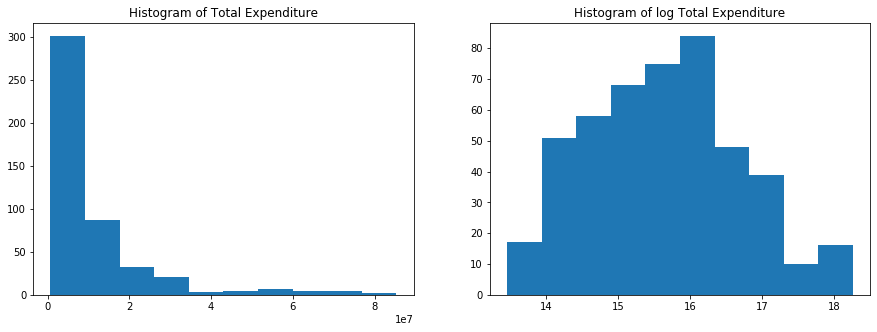

In [19]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(education_df["TOTAL_EXPENDITURE"])
plt.title("Histogram of Total Expenditure")

plt.subplot(1,2,2)
plt.hist(np.log(education_df["TOTAL_EXPENDITURE"]))
plt.title("Histogram of log Total Expenditure")

plt.show()

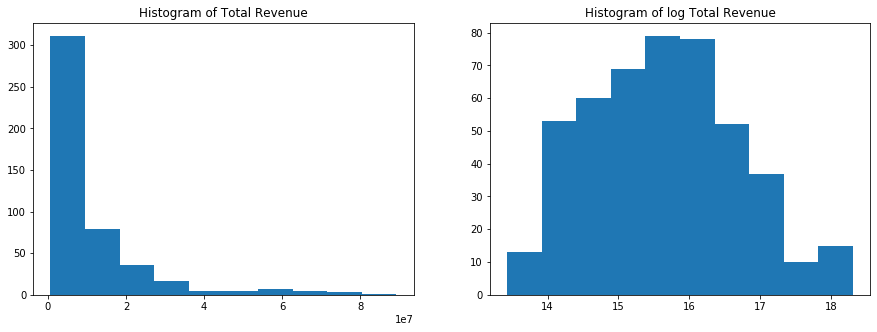

In [20]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist((education_df["TOTAL_REVENUE"]))
plt.title("Histogram of Total Revenue")


plt.subplot(1,2,2)
plt.hist(np.log(education_df["TOTAL_REVENUE"]))
plt.title("Histogram of log Total Revenue")
plt.show()

In [21]:
#Question 3

In [22]:
budget_deficit = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE

Text(0.5, 1.0, 'Box plot of budget deficit')

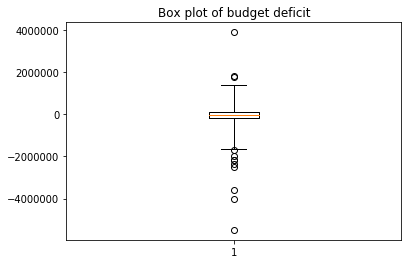

In [23]:
plt.boxplot(budget_deficit, whis = 5)
plt.title("Box plot of budget deficit")

In [24]:
winsorized_budget = winsorize(budget_deficit, (0.05, 0.05))

winsorized_budget

masked_array(data=[-2.071700e+05, -2.482510e+05, -1.139970e+05,
                   -2.787110e+05, -1.839620e+05,  1.477910e+05,
                   -2.437100e+04, -2.517830e+05, -3.253100e+04,
                   -2.614500e+04, -2.036470e+05,  6.425800e+04,
                    2.004500e+04, -1.366880e+05, -3.498190e+05,
                    2.036400e+04,  1.080020e+05, -7.110000e+02,
                   -1.611630e+05, -1.604280e+05, -2.288650e+05,
                   -2.237950e+05, -1.784350e+05,  5.162150e+04,
                   -1.173500e+05,  8.197400e+04,  1.614550e+05,
                    5.605110e+05,  2.787980e+05,  2.261600e+04,
                    3.132560e+05,  4.138400e+04, -1.575500e+04,
                   -2.848600e+04,  1.911810e+05, -1.808830e+05,
                   -2.176600e+04, -4.988600e+04,  6.334900e+04,
                   -2.092000e+03, -3.916440e+05, -3.334800e+04,
                    5.316700e+04,  9.842300e+04, -1.850220e+05,
                    2.666400e+04, -2.111

Text(0.5, 1.0, 'Box plot of Budget Deficit')

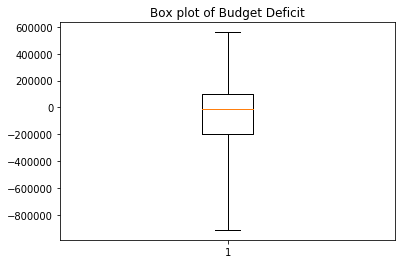

In [25]:
plt.boxplot(winsorized_budget, whis=5)
plt.title("Box plot of Budget Deficit")

In [26]:
#Question 4

In [27]:
budget_deficit2 = education_df.TOTAL_EXPENDITURE - education_df.TOTAL_REVENUE

Text(0.5, 1.0, 'Box plot of budget deficit2')

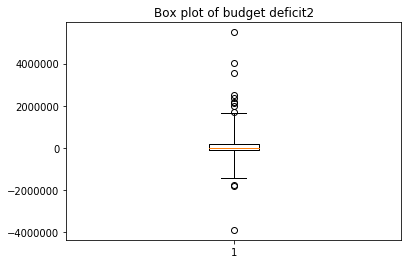

In [28]:
plt.boxplot(budget_deficit2, whis = 5)
plt.title("Box plot of budget deficit2")

In [ ]:
#Yes, there are outliers

In [31]:
winsorized_budget2 = winsorize(budget_deficit2, (0.05, 0.05))

winsorized_budget

masked_array(data=[ 2.071700e+05,  2.482510e+05,  1.139970e+05,
                    2.787110e+05,  1.839620e+05, -1.477910e+05,
                    2.437100e+04,  2.517830e+05,  3.253100e+04,
                    2.614500e+04,  2.036470e+05, -6.425800e+04,
                   -2.004500e+04,  1.366880e+05,  3.498190e+05,
                   -2.036400e+04, -1.080020e+05,  7.110000e+02,
                    1.611630e+05,  1.604280e+05,  2.288650e+05,
                    2.237950e+05,  1.784350e+05, -5.162150e+04,
                    1.173500e+05, -8.197400e+04, -1.614550e+05,
                   -5.605110e+05, -2.787980e+05, -2.261600e+04,
                   -3.132560e+05, -4.138400e+04,  1.575500e+04,
                    2.848600e+04, -1.911810e+05,  1.808830e+05,
                    2.176600e+04,  4.988600e+04, -6.334900e+04,
                    2.092000e+03,  3.916440e+05,  3.334800e+04,
                   -5.316700e+04, -9.842300e+04,  1.850220e+05,
                   -2.666400e+04,  2.111

Text(0.5, 1.0, 'Box plot of Budget Deficit')

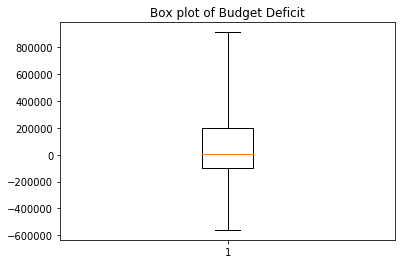

In [32]:
plt.boxplot(winsorized_budget2, whis=5)
plt.title("Box plot of Budget Deficit")

In [ ]:
#Question 5

In [ ]:
##Differences: range is greater with the Deficit Budget 2, the Mean seems to be similar for both, but the 25th and 75th quartiles are smaller in the Budget deficit 1.

In [ ]:
#Question 6

In [ ]:
##The third question would be most desirable becuase it's differences is truer to identifying the deficit.